# Harry Potter Sentiment Analysis using Python

In [76]:
import os
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [77]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\matia\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [78]:
os.getcwd()

'C:\\Users\\matia\\OneDrive - Universidad del Pacífico\\Universidad del Pacifico\\2022-1\\AI & Data Analytics\\Trabajo Final\\data'

## Loading web scraped data about the book

In [79]:
df_book = pd.read_csv (r'HarryPotterLibro.csv')
df_book

,User_name,User_Title,User_Review,User_Helpful,User_Date,User_Location,User_Stars
0,Airborne,Stephen Fry > Jim Dale,Jim Dale's character voices were no where near...,31.0,13 de junio de 2021,Estados Unidos,1.0
1,kimbacaffeinate,Dale does a wonderful job bringing these chara...,t was wonderful revisiting this story. The las...,34.0,20 de julio de 2017,Estados Unidos,5.0
2,wayne t.,Delightful,Excellent story and the narrator made it even ...,11.0,29 de octubre de 2019,Estados Unidos,5.0
3,Karen Compton,Loved,I loved listening to this book! I read the ser...,8.0,1 de enero de 2020,Estados Unidos,5.0
4,Gregorus S. Davis,"Overall the narrator does a good job, although...",I purchased it for a road trip and it kept the...,9.0,17 de junio de 2018,Estados Unidos,3.0
...,...,...,...,...,...,...,...
411,Maribel,Love,Love it,NaN,12 de septiembre de 2020,Estados Unidos,5.0
412,Steve,Fantastic!,Great to listen to while I am on my treadmill....,NaN,26 de agosto de 2020,Estados Unidos,5.0
413,Jasmine,It's good,"I loved it, no dislikes",NaN,5 de noviembre de 2020,Estados Unidos,5.0
414,Terri A. Griffin,Must Read Series,"Even if you've seen the movies, these books ar...",NaN,1 de noviembre de 2020,Estados Unidos,5.0


In [80]:
dataset_book = pd.DataFrame(df_book['User_Review'])
dataset_book.columns = ['Review']
dataset_book = dataset_book.dropna()
dataset_book

,Review
0,Jim Dale's character voices were no where near...
1,t was wonderful revisiting this story. The las...
2,Excellent story and the narrator made it even ...
3,I loved listening to this book! I read the ser...
4,I purchased it for a road trip and it kept the...
...,...
411,Love it
412,Great to listen to while I am on my treadmill....
413,"I loved it, no dislikes"
414,"Even if you've seen the movies, these books ar..."


## Sentiment analysis of book reviews

In [81]:
analyzer = SentimentIntensityAnalyzer()

### Sentiment of the first observation

In [82]:
score = analyzer.polarity_scores(dataset_book['Review'][0])
print(score)

{'neg': 0.084, 'neu': 0.805, 'pos': 0.111, 'compound': 0.1779}


### Analysis for the whole dataset

In [83]:
result = {'positive': 0, 'negative': 0, 'neutral': 0}

In [84]:
book_reviews_w_sentiment = pd.DataFrame(columns=['Review','Sentiment'])

In [85]:
for review in dataset_book['Review']:
    score = analyzer.polarity_scores(str(review))
    if score['compound'] > 0.05:
        result['positive'] += 1
    elif score['compound'] < -0.05:
        result['negative'] += 1
    else:
        result['neutral'] += 1
    book_reviews_w_sentiment = book_reviews_w_sentiment.append({'Review': review, 'Sentiment': score['compound']},ignore_index=True) 

In [86]:
reviews_with_sentiment

,Review,Sentiment
0,Jim Dale's character voices were no where near...,0.1779
1,t was wonderful revisiting this story. The las...,0.9680
2,Excellent story and the narrator made it even ...,0.9436
3,I loved listening to this book! I read the ser...,0.9175
4,I purchased it for a road trip and it kept the...,0.8834
...,...,...
827,Love it,0.6369
828,Great to listen to while I am on my treadmill....,0.4939
829,"I loved it, no dislikes",0.0000
830,"Even if you've seen the movies, these books ar...",0.7475


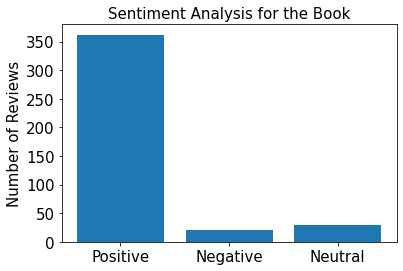

In [87]:
objects = ('Positive', 'Negative', 'Neutral')
y_pos = np.arange(len(objects))
performance = [result['positive'],result['negative'],result['neutral']]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Reviews',fontsize=15)
plt.title('Sentiment Analysis for the Book',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [88]:
book_reviews_w_sentiment.to_csv("book_reviews_w_sentiment.csv",index=False)

## Loading web scraped data about the movie

In [89]:
df_movie = pd.read_csv (r'HarryPotterPelicula.csv')
df_movie

,Title_name,Title_User,Title_Review,Title_Date,Title_Stars,Title_Hepful,Unnamed: 6
0,Great fun!,TheLittleSongbird,"I really liked this film, but I much prefer th...",21 April 2009,8.0,21.0,NaN
1,Gem of a children's film and a fine adaptation...,Leofwine_draca,NaN,3 August 2016,7.0,NaN,NaN
2,Good Start to the Series,Michael_Elliott,NaN,5 March 2016,0.0,NaN,NaN
3,Great chemistry set up for the rest of the series,SnoopyStyle,Harry Potter is an orphan living with his igno...,21 December 2013,8.0,3.0,NaN
4,Charming and Endearing!,Hitchcoc,How sad it is to begin the reader's comments w...,28 November 2001,9.0,NaN,NaN
...,...,...,...,...,...,...,...
522,"Magic, that's magic",TOT_EchoofGlory,NaN,2 June 2020,0.0,0.0,NaN
523,An acceptable enough origin story,anifanmc,NaN,16 February 2009,7.0,NaN,NaN
524,WOW!!! Probably among the worst 50 movies of a...,AlienByChoice,I have never read the book this film is suppos...,28 August 2002,1.0,8.0,NaN
525,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
dataset_movie = pd.DataFrame(df_movie['Title_Review'])
dataset_movie.columns = ['Review']
dataset_movie = dataset_movie.dropna()
dataset_movie

,Review
0,"I really liked this film, but I much prefer th..."
3,Harry Potter is an orphan living with his igno...
4,How sad it is to begin the reader's comments w...
8,"If you don't know your Potter (like me), than ..."
10,With the sixth book now out (and one more to g...
...,...
518,The only regret I have about HARRY POTTER AND ...
519,Harry Potter and the Philosopher's Stone\nQuit...
520,"Unfortunately, the books were not my introduct..."
521,HARRY POTTER ***_ Fantasy / Adventure Daniel R...


## Sentiment analysis of movie reviews

### Analysis for the whole dataset

In [91]:
result = {'positive': 0, 'negative': 0, 'neutral': 0}

In [92]:
movie_reviews_w_sentiment = pd.DataFrame(columns=['Review','Sentiment'])

In [93]:
for review in dataset_movie['Review']:
    score = analyzer.polarity_scores(str(review))
    if score['compound'] > 0.05:
        result['positive'] += 1
    elif score['compound'] < -0.05:
        result['negative'] += 1
    else:
        result['neutral'] += 1
    movie_reviews_w_sentiment = movie_reviews_w_sentiment.append({'Review': review, 'Sentiment': score['compound']},ignore_index=True)

In [94]:
movie_reviews_w_sentiment

,Review,Sentiment
0,"I really liked this film, but I much prefer th...",0.9813
1,Harry Potter is an orphan living with his igno...,0.9859
2,How sad it is to begin the reader's comments w...,0.9775
3,"If you don't know your Potter (like me), than ...",-0.8672
4,With the sixth book now out (and one more to g...,0.9570
...,...,...
371,The only regret I have about HARRY POTTER AND ...,0.9771
372,Harry Potter and the Philosopher's Stone\nQuit...,0.9684
373,"Unfortunately, the books were not my introduct...",0.9876
374,HARRY POTTER ***_ Fantasy / Adventure Daniel R...,-0.1298


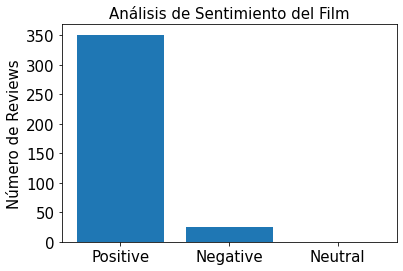

In [95]:
objects = ('Positive', 'Negative', 'Neutral')
y_pos = np.arange(len(objects))
performance = [result['positive'],result['negative'],result['neutral']]

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Número de Reviews',fontsize=15)
plt.title('Análisis de Sentimiento del Film',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [96]:
movie_reviews_w_sentiment.to_csv("movie_reviews_w_sentiment.csv",index=False)